In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Dataset
# wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

In [2]:
# load all examples from the file
data = np.genfromtxt('winequality-white.csv',delimiter=";",skip_header=1)

print("data:", data.shape)

# Prepare for proper training
np.random.shuffle(data)

# take the first 3000 examples for training
X_train = data[:3000,:11] # all features except last column
y_train = data[:3000,11]  # quality column

# and the remaining examples for testing
X_test = data[3000:,:11] # all features except last column
y_test = data[3000:,11] # quality column

print("First example:")
print("Features:", X_train[0])
print("Quality:", y_train[0])

data: (4898, 12)
First example:
Features: [7.0000e+00 3.6000e-01 2.5000e-01 5.7000e+00 1.5000e-02 1.4000e+01
 7.3000e+01 9.8963e-01 2.8200e+00 5.9000e-01 1.3200e+01]
Quality: 6.0


Feature: fixed acidity
Correlation coefficient: -0.12317096794394919


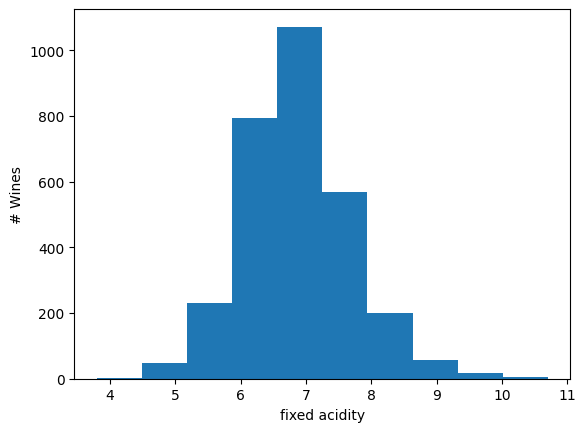

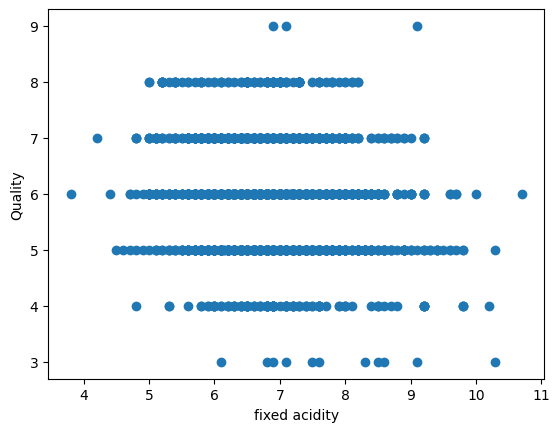

Feature: volatile acidity
Correlation coefficient: -0.20249969150553165


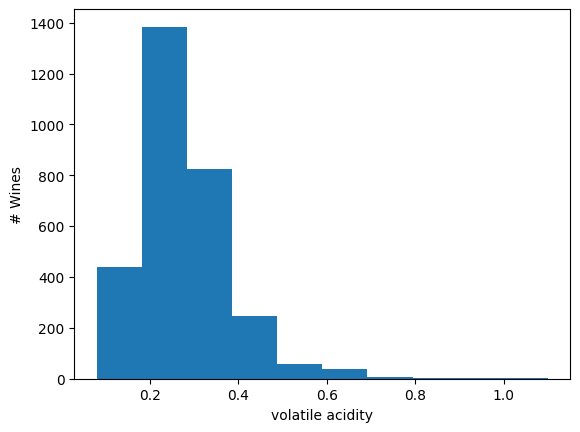

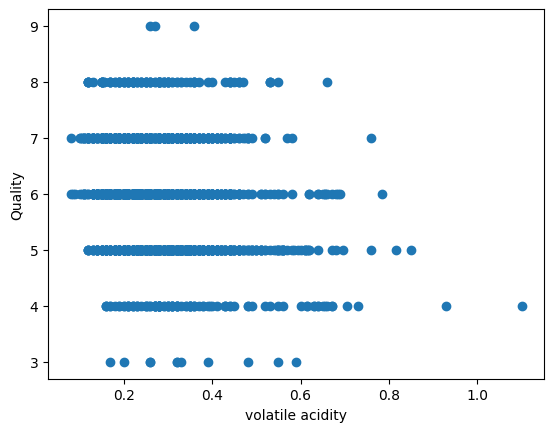

Feature: citric acid
Correlation coefficient: -0.02590986513708018


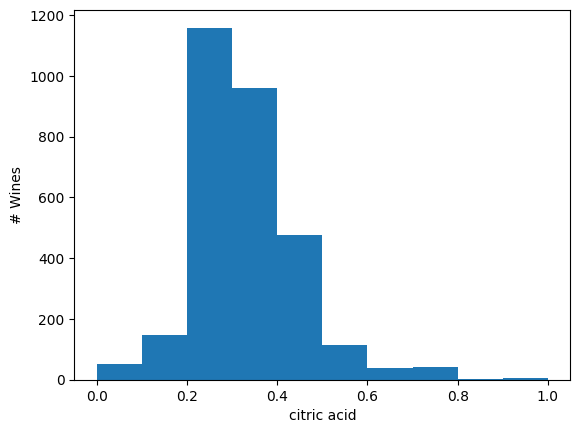

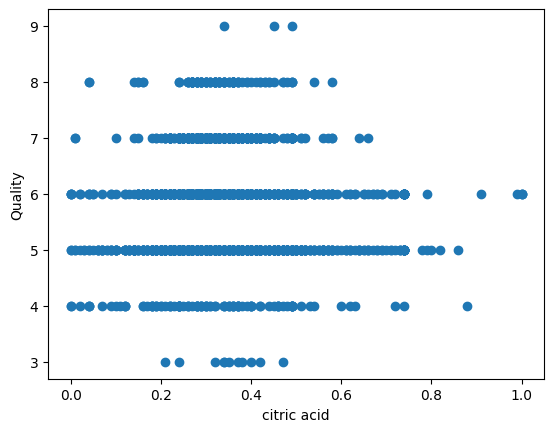

Feature: residual sugar
Correlation coefficient: -0.10646943126706804


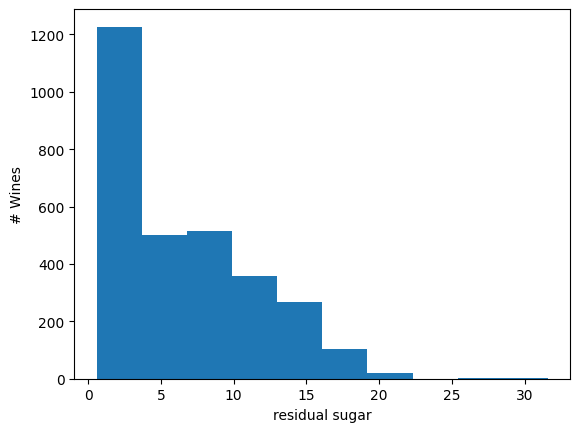

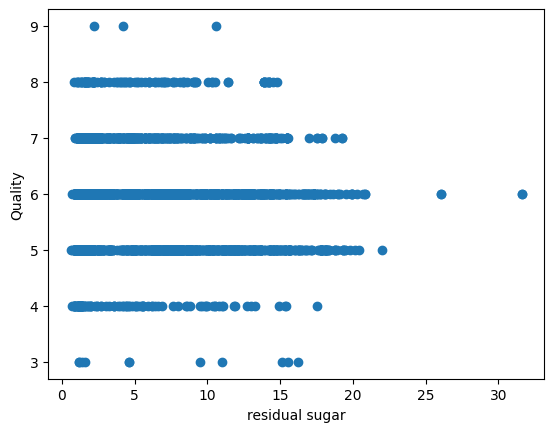

Feature: chlorides
Correlation coefficient: -0.20663591775622572


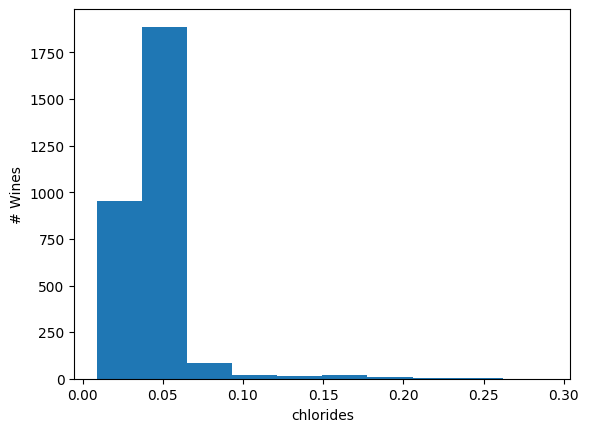

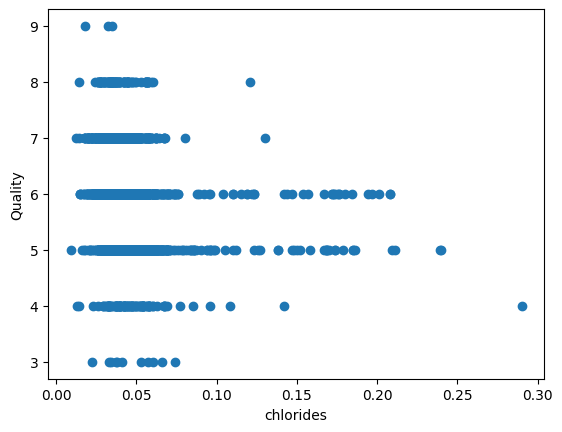

Feature: free sulfur dioxide
Correlation coefficient: 0.0297707526102032


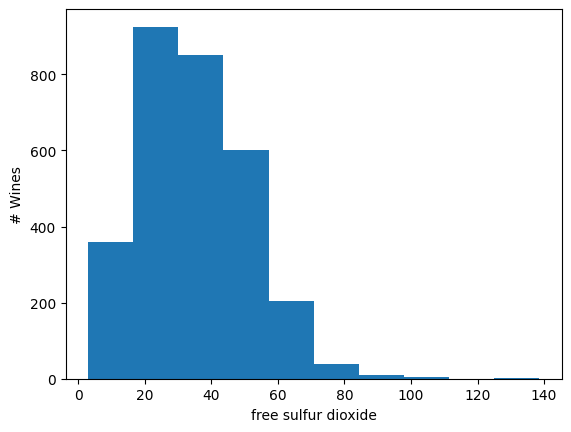

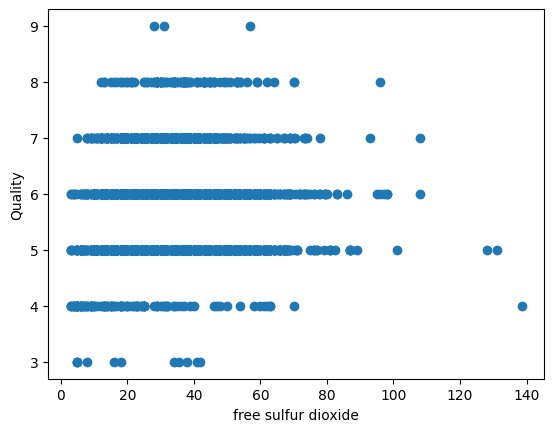

Feature: total sulfur dioxide
Correlation coefficient: -0.17457455476133724


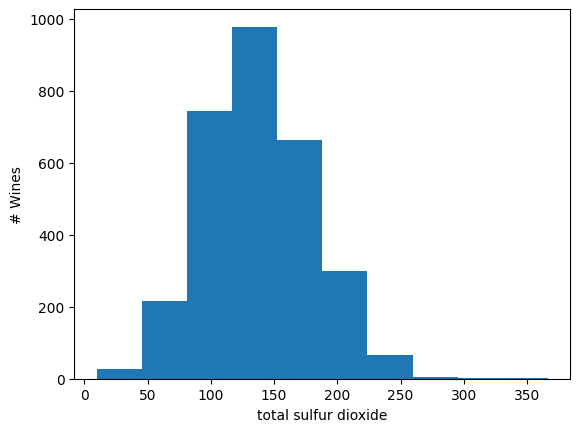

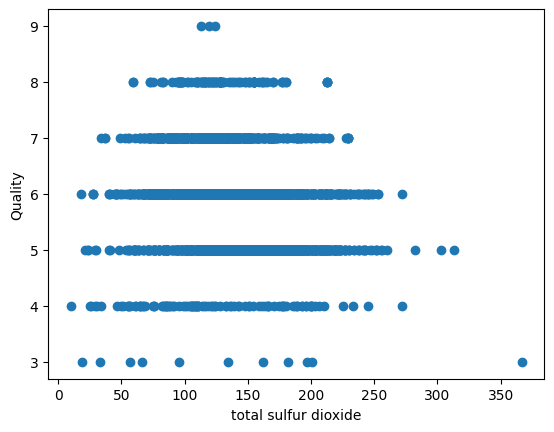

Feature: density
Correlation coefficient: -0.31974889429867726


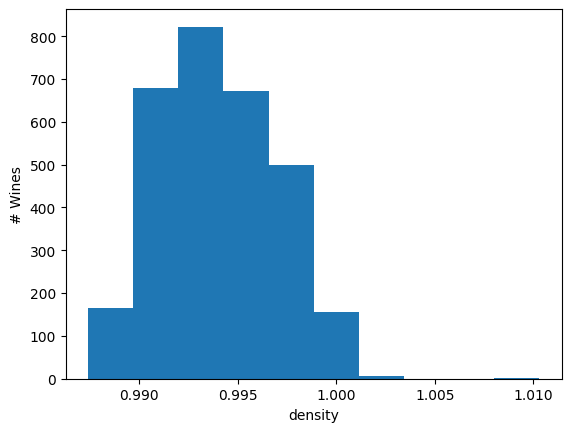

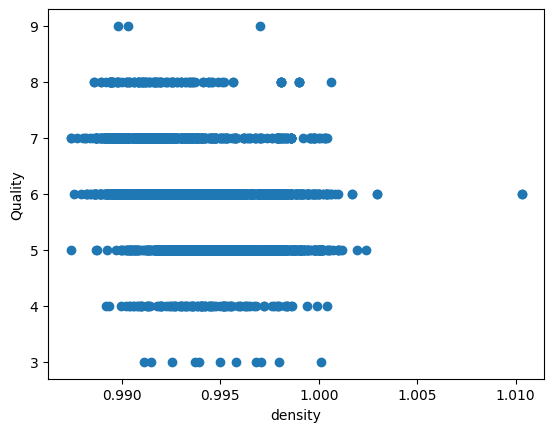

Feature: pH
Correlation coefficient: 0.10522678489088483


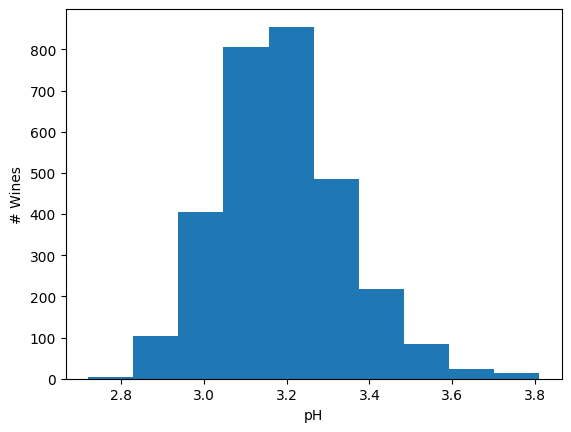

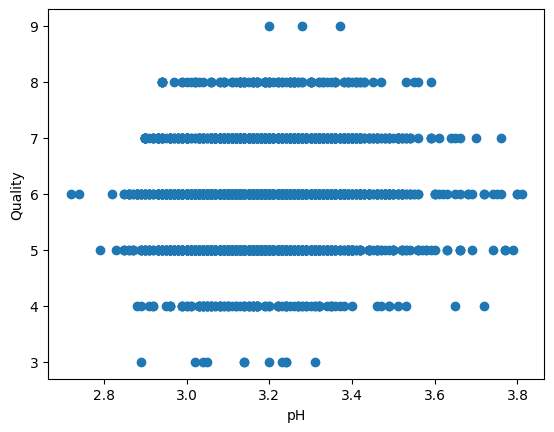

Feature: sulphates
Correlation coefficient: 0.05211290519513521


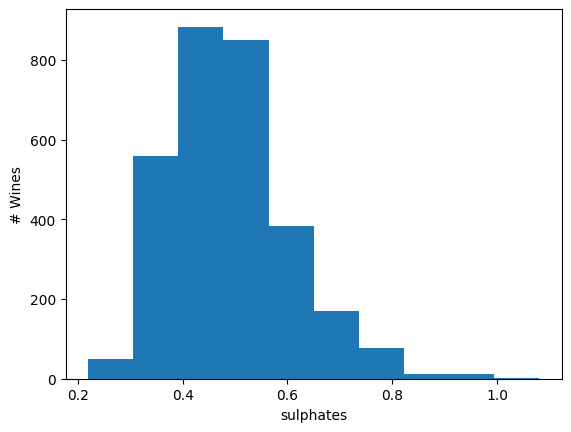

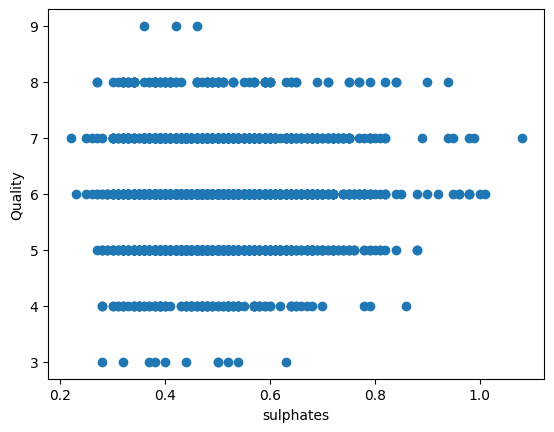

Feature: alcohol
Correlation coefficient: 0.4345640278198291


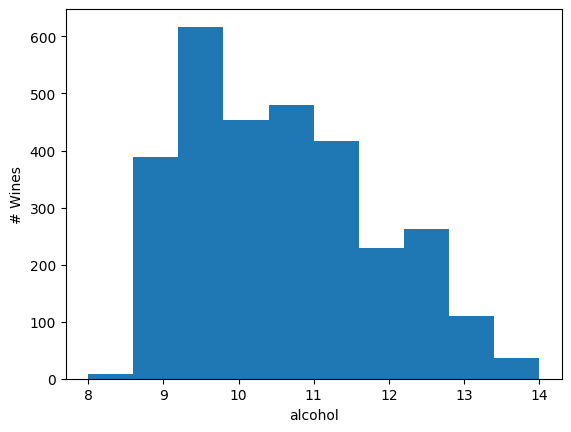

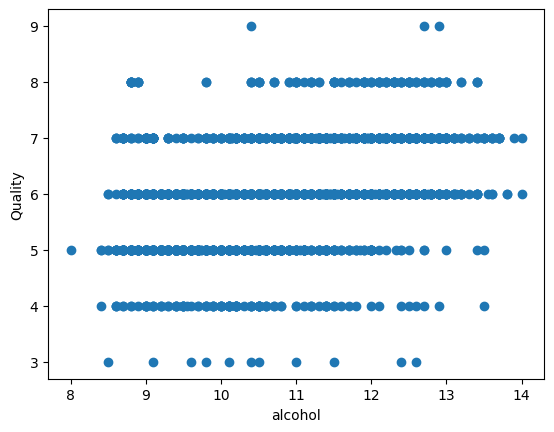

In [3]:
features = ["fixed acidity", "volatile acidity", "citric acid", 
            "residual sugar", "chlorides", "free sulfur dioxide", 
            "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]

for i_feat, feat in enumerate(features):
    plt.clf()
    print("Feature:", feat)
    print("Correlation coefficient:", 
          np.corrcoef(X_train[:,i_feat],y_train)[0,1]) 

    # 1D Histogram 
    plt.hist(X_train[:,i_feat])
    plt.xlabel(feat)
    plt.ylabel("# Wines")
    plt.show()
    
    # Scatter Plot
    plt.scatter(X_train[:,i_feat],y_train)
    plt.xlabel(feat)
    plt.ylabel("Quality")
    plt.show()

In [4]:
# Calulate weights using train data
# w = (X_T X)^{-1} X_T y
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train)), X_train.T),y_train)
print(w.shape)
print(w)

(11,)
[-4.56494958e-02 -2.11346569e+00 -1.38900247e-01  2.25233228e-02
 -4.98288341e-01  6.98398820e-03 -1.10684897e-03  2.12603647e+00
  1.22503325e-01  3.97277558e-01  3.72096371e-01]


(1898, 11) (11,) (1898,)
[6.7000e+00 3.4000e-01 3.1000e-01 1.6400e+01 5.1000e-02 2.0000e+01
 1.4600e+02 9.9834e-01 3.0600e+00 5.4000e-01 9.1000e+00]
[-4.56494958e-02 -2.11346569e+00 -1.38900247e-01  2.25233228e-02
 -4.98288341e-01  6.98398820e-03 -1.10684897e-03  2.12603647e+00
  1.22503325e-01  3.97277558e-01  3.72096371e-01]
5.352534855100027
Correlation coefficient: 0.5060492310549481


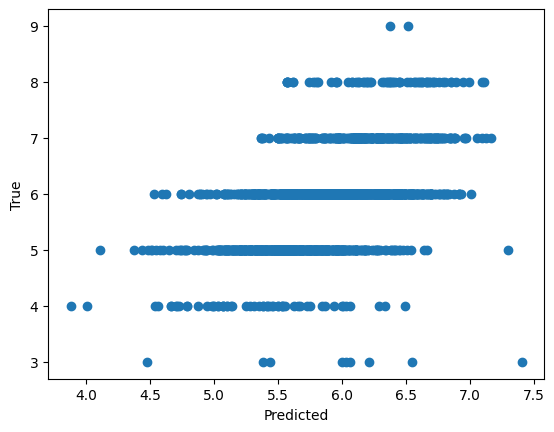

In [5]:
# Evaluate linear regression model 
y_pred = np.matmul(X_test,w)
print(X_test.shape,w.shape,y_pred.shape)

print(X_test[0])
print(w)
print(y_pred[0])


print("Correlation coefficient:", np.corrcoef(y_pred,y_test)[0,1])

# Prepare scatter plot
plt.scatter(y_pred,y_test)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()